In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
Ct = 10**-9          #1/Pas   
u = 0.002            #Pas.S   
Pi=30*10**6          #Pas
t= 21600000
D_t=86400       #c
Phi = np.array([.2, .09, .15, .11])
Cells = ['0,0', '0,1', '1,0', '1,1']
Sample = pd.DataFrame (Phi,
                      index=Cells, columns = ['Phi'])
Sample['Kx']=np.array([0.02*10**-12, 0.04*10**-12 , 0.06*10**-12 , 0.01*10**-12])
Sample['q']=np.array([0, -1, 6, 0])/86400
Sample['D_x']=np.array([500, 200, 500, 200])
Sample['D_y']=np.array([300, 300, 300, 300])
Sample['D_z']=np.array([20, 45, 30, 25])

Sample

,Phi,Kx,q,D_x,D_y,D_z
"0,0",0.20,2.000000e-14,0.000000,500,300,20
"0,1",0.09,4.000000e-14,-0.000012,200,300,45
"1,0",0.15,6.000000e-14,0.000069,500,300,30
"1,1",0.11,1.000000e-14,0.000000,200,300,25


# Explicit

In [3]:
Sample['Ax'] = Sample['D_z']*Sample['D_y']
Sample['Ay'] = Sample['D_z']*Sample['D_x']
#m^2
Sample

,Phi,Kx,q,D_x,D_y,D_z,Ax,Ay
"0,0",0.20,2.000000e-14,0.000000,500,300,20,6000,10000
"0,1",0.09,4.000000e-14,-0.000012,200,300,45,13500,9000
"1,0",0.15,6.000000e-14,0.000069,500,300,30,9000,15000
"1,1",0.11,1.000000e-14,0.000000,200,300,25,7500,5000


In [4]:
#calculate transmissibility

T_00_01=((2*Sample['Ax']['0,0']*Sample['Kx']['0,0']*Sample['Ax']['0,1']*Sample['Kx']['0,1'])/
(Sample['Ax']['0,0']*Sample['Kx']['0,0']*Sample['D_x']['0,1']+Sample['Ax']['0,1']*Sample['Kx']['0,1']*Sample['D_x']['0,0']))/u

T_01_11=((2*Sample['Ay']['0,1']*Sample['Kx']['0,1']*Sample['Ay']['1,1']*Sample['Kx']['1,1'])/
(Sample['Ay']['0,1']*Sample['Kx']['0,1']*Sample['D_y']['1,1']+Sample['Ay']['1,1']*Sample['Kx']['1,1']*Sample['D_y']['0,1']))/u

T_11_10=((2*Sample['Ax']['1,1']*Sample['Kx']['1,1']*Sample['Ax']['1,0']*Sample['Kx']['1,0'])/
(Sample['Ax']['1,1']*Sample['Kx']['1,1']*Sample['D_x']['1,0']+Sample['Ax']['1,0']*Sample['Kx']['1,0']*Sample['D_x']['1,1']))/u

T_10_00=((2*Sample['Ay']['1,0']*Sample['Kx']['1,0']*Sample['Ay']['0,0']*Sample['Kx']['0,0'])/
(Sample['Ay']['1,0']*Sample['Kx']['1,0']*Sample['D_y']['0,0']+Sample['Ay']['0,0']*Sample['Kx']['0,0']*Sample['D_y']['1,0']))/u


In [5]:
T = np.array([T_00_01, T_01_11, T_11_10, T_10_00])
Faces = ['00_01', '01_11', '11_10', '10_00']
NewSample = pd.DataFrame (T,
                      index=Faces, columns = ['T'])
NewSample

,T
00_01,2.204082e-10
01_11,1.463415e-10
11_10,2.783505e-10
10_00,5.454545e-10


In [6]:
#calculate cell's volume
Sample['V']=Sample['D_x']*Sample['D_y']*Sample['D_z']
Sample

,Phi,Kx,q,D_x,D_y,D_z,Ax,Ay,V
"0,0",0.20,2.000000e-14,0.000000,500,300,20,6000,10000,3000000
"0,1",0.09,4.000000e-14,-0.000012,200,300,45,13500,9000,2700000
"1,0",0.15,6.000000e-14,0.000069,500,300,30,9000,15000,4500000
"1,1",0.11,1.000000e-14,0.000000,200,300,25,7500,5000,1500000


In [7]:
#calculate pressure
NIter=t/D_t+1

AT_00=Ct*Sample['Phi']['0,0']*Sample['V']['0,0']/D_t
AT_01=Ct*Sample['Phi']['0,1']*Sample['V']['0,1']/D_t
AT_11=Ct*Sample['Phi']['1,1']*Sample['V']['1,1']/D_t
AT_10=Ct*Sample['Phi']['1,0']*Sample['V']['1,0']/D_t

P_00=np.zeros([int(NIter),1])
P_01=np.zeros([int(NIter),1])
P_10=np.zeros([int(NIter),1])
P_11=np.zeros([int(NIter),1])

P_00[0]=P_01[0]=P_10[0]=P_11[0]=Pi

print("|    n   |      P_00      |      P_01      |      P_11      |      P_10      |")
for n in range(0, int(NIter)-1):
    P_00[n+1]=P_00[n]+(D_t/(Ct*Sample['Phi']['0,0']*Sample['V']['0,0']))*(T_00_01*(P_01[n]-P_00[n])-T_10_00*(P_00[n]-P_10[n])+Sample['q']['0,0'])

    P_01[n+1]=P_01[n]+(D_t/(Ct*Sample['Phi']['0,1']*Sample['V']['0,1']))*(T_01_11*(P_11[n]-P_01[n])-T_00_01*(P_01[n]-P_00[n])+Sample['q']['0,1'])

    P_11[n+1]=P_11[n]+(D_t/(Ct*Sample['Phi']['1,1']*Sample['V']['1,1']))*(T_11_10*(P_10[n]-P_11[n])-T_01_11*(P_11[n]-P_01[n])+Sample['q']['1,1'])

    P_10[n+1]=P_10[n]+(D_t/(Ct*Sample['Phi']['1,0']*Sample['V']['1,0']))*(T_10_00*(P_00[n]-P_10[n])-T_11_10*(P_10[n]-P_11[n])+Sample['q']['1,1'])
    
    print('|  %4.0f  |  %10.3f  |  %10.3f  |  %10.3f  |  %10.3f  |' % (n+1, P_00[n+1], P_01[n+1], P_11[n+1], P_10[n+1] ))
    

|    n   |      P_00      |      P_01      |      P_11      |      P_10      |
|     1  |  30000000.000  |  29995884.774  |  30000000.000  |  30000000.000  |
|     2  |  29999869.388  |  29992306.172  |  29999684.651  |  30000000.000  |
|     3  |  29999639.600  |  29989167.576  |  29999165.204  |  29999979.645  |
|     4  |  29999333.939  |  29986393.216  |  29998517.797  |  29999926.886  |
|     5  |  29998969.790  |  29983922.992  |  29997794.075  |  29999835.284  |
|     6  |  29998560.204  |  29981708.691  |  29997028.653  |  29999702.131  |
|     7  |  29998115.050  |  29979711.209  |  29996244.360  |  29999527.150  |
|     8  |  29997641.849  |  29977898.505  |  29995455.911  |  29999311.598  |
|     9  |  29997146.371  |  29976244.068  |  29994672.475  |  29999057.645  |
|    10  |  29996633.079  |  29974725.776  |  29993899.470  |  29998767.965  |
|    11  |  29996105.454  |  29973325.023  |  29993139.800  |  29998445.452  |
|    12  |  29995566.227  |  29972026.051  |  299923

Text(0.5, 1.0, 'Explicit. Delta t=10 days')

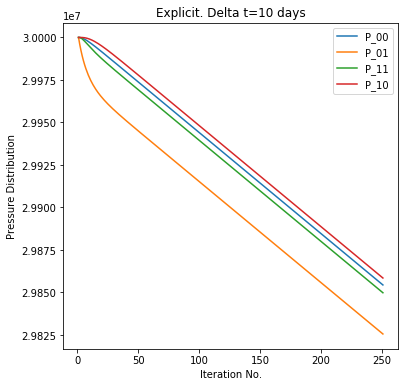

In [8]:
D = plt.figure(figsize=[6,6])
plt.plot(np.arange(1, int(NIter)+1), P_00[:],label = 'P_00')
plt.plot(np.arange(1, int(NIter)+1), P_01[:],label = 'P_01')
plt.plot(np.arange(1, int(NIter)+1), P_11[:],label = 'P_11')
plt.plot(np.arange(1, int(NIter)+1), P_10[:],label = 'P_10')
plt.xlabel('Iteration No.')
plt.ylabel('Pressure Distribution')
plt.legend(loc = 'upper right')
plt.title('Explicit. Delta t=10 days')

# Compute delta t for stability

In [9]:
D_tst_00=(Ct*Sample['Phi']['0,0']*Sample['V']['0,0'])/(T_00_01+T_10_00)*(1/60)*(1/60)*(1/24)
D_tst_01=(Ct*Sample['Phi']['0,1']*Sample['V']['0,1'])/(T_01_11+T_00_01)*(1/60)*(1/60)*(1/24)
D_tst_11=(Ct*Sample['Phi']['1,1']*Sample['V']['1,1'])/(T_11_10+T_01_11)*(1/60)*(1/60)*(1/24)
D_tst_10=(Ct*Sample['Phi']['1,0']*Sample['V']['1,0'])/(T_10_00+T_11_10)*(1/60)*(1/60)*(1/24)
print("|  D_tst_00  |  D_tst_01  |  D_tst_11  |  D_tst_10  |")
print('|  %8.2f  |  %8.2f  |  %8.2f  |  %8.2f  |' % (D_tst_00, D_tst_01, D_tst_11, D_tst_10)) 


|  D_tst_00  |  D_tst_01  |  D_tst_11  |  D_tst_10  |
|      9.07  |      7.67  |      4.50  |      9.48  |


# Implicit

In [10]:
S1_imp=np.zeros([int(NIter)])
S2_imp=np.zeros([int(NIter)])
S3_imp=np.zeros([int(NIter)])
S4_imp=np.zeros([int(NIter)])

Pnimp_00=np.zeros([int(NIter)])
Pnimp_01=np.zeros([int(NIter)])
Pnimp_10=np.zeros([int(NIter)])
Pnimp_11=np.zeros([int(NIter)])
Pnimp_00[0]=Pnimp_01[0]=Pnimp_11[0]=Pnimp_10[0]=Pi

AT_00=Ct*Sample['Phi']['0,0']*Sample['V']['0,0']/D_t
AT_01=Ct*Sample['Phi']['0,1']*Sample['V']['0,1']/D_t
AT_11=Ct*Sample['Phi']['1,1']*Sample['V']['1,1']/D_t
AT_10=Ct*Sample['Phi']['1,0']*Sample['V']['1,0']/D_t

Sum1=0
Sum2=0
print("|    n   |    Pnimp_00    |    Pnimp_01    |    Pnimp_11    |    Pnimp_10    |")

for m in range(0,int(NIter)-1):

    A=np.array([[-T_10_00-T_00_01-AT_00, T_00_01, 0, T_10_00],
                [T_00_01, -T_00_01-T_01_11-AT_01, T_01_11, 0],
                [0,T_01_11, -T_01_11-T_11_10-AT_11, T_11_10],
                [T_10_00,0,T_11_10,-T_11_10-T_10_00-AT_10]])

    B=np.array([[-AT_00*Pnimp_00[m]-Sample['q']['0,0']],
                  [-AT_01*Pnimp_01[m]-Sample['q']['0,1']],
                  [-AT_11*Pnimp_11[m]-Sample['q']['1,1']],
                  [-AT_10*Pnimp_10[m]-Sample['q']['1,0']]])
      #solve linear equation system
    P=np.linalg.solve(A,B)
    
    Pnimp_00[m+1]=P[0]
    Pnimp_01[m+1]=P[1]
    Pnimp_11[m+1]=P[2]
    Pnimp_10[m+1]=P[3]
    #MB check
    
    S1_imp[m]=AT_00*(Pnimp_00[m+1]-Pnimp_00[m])
    S2_imp[m]=AT_01*(Pnimp_01[m+1]-Pnimp_01[m])
    S3_imp[m]=AT_11*(Pnimp_11[m+1]-Pnimp_11[m])
    S4_imp[m]=AT_10*(Pnimp_10[m+1]-Pnimp_10[m])
    
    #Sum1=Sum1+S1+S2+S3+S4
    #Sum2=Sum2+Sample['q']['0,0']+Sample['q']['0,1']+Sample['q']['1,1']+Sample['q']['1,0']
    
    print('|  %4.0f  |  %10.3f  |  %10.3f  |  %10.3f  |  %10.3f  |' % (m+1, Pnimp_00[m+1], Pnimp_01[m+1], Pnimp_11[m+1], Pnimp_10[m+1] ))


|    n   |    Pnimp_00    |    Pnimp_01    |    Pnimp_11    |    Pnimp_10    |
|     1  |  30000470.480  |  29996426.227  |  30000741.146  |  30008094.592  |
|     2  |  30001332.101  |  29993384.298  |  30002041.364  |  30015513.378  |
|     3  |  30002519.829  |  29990854.832  |  30003762.246  |  30022354.975  |
|     4  |  30003980.187  |  29988812.143  |  30005798.785  |  30028701.834  |
|     5  |  30005669.066  |  29987226.791  |  30008071.491  |  30034623.191  |
|     6  |  30007549.976  |  29986067.439  |  30010520.329  |  30040177.441  |
|     7  |  30009592.635  |  29985302.186  |  30013100.086  |  30045414.035  |
|     8  |  30011771.844  |  29984899.498  |  30015776.810  |  30050375.025  |
|     9  |  30014066.573  |  29984828.855  |  30018525.093  |  30055096.302  |
|    10  |  30016459.226  |  29985061.162  |  30021325.992  |  30059608.613  |
|    11  |  30018935.037  |  29985569.012  |  30024165.442  |  30063938.385  |
|    12  |  30021481.592  |  29986326.820  |  300270

|   187  |  30538757.826  |  30487341.726  |  30546088.992  |  30597357.899  |
|   188  |  30541728.711  |  30490312.611  |  30549059.877  |  30600328.784  |
|   189  |  30544699.596  |  30493283.496  |  30552030.763  |  30603299.669  |
|   190  |  30547670.482  |  30496254.382  |  30555001.648  |  30606270.555  |
|   191  |  30550641.367  |  30499225.267  |  30557972.533  |  30609241.440  |
|   192  |  30553612.252  |  30502196.152  |  30560943.419  |  30612212.325  |
|   193  |  30556583.138  |  30505167.038  |  30563914.304  |  30615183.211  |
|   194  |  30559554.023  |  30508137.923  |  30566885.189  |  30618154.096  |
|   195  |  30562524.908  |  30511108.808  |  30569856.075  |  30621124.981  |
|   196  |  30565495.794  |  30514079.694  |  30572826.960  |  30624095.867  |
|   197  |  30568466.679  |  30517050.579  |  30575797.845  |  30627066.752  |
|   198  |  30571437.564  |  30520021.464  |  30578768.730  |  30630037.637  |
|   199  |  30574408.450  |  30522992.350  |  305817

Text(0.5, 1.0, 'Implicit. Delta t=5 days')

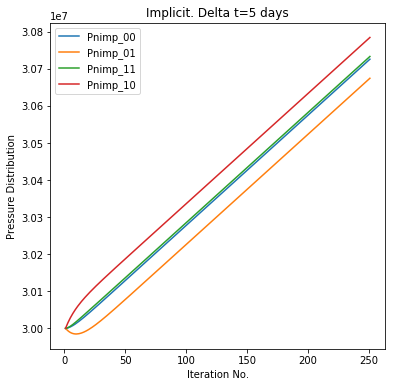

In [11]:
D = plt.figure(figsize=[6,6])
Leg = 'Pnimp_00'
plt.plot(np.arange(1, int(NIter)+1), Pnimp_00[:],label = 'Pnimp_00')
plt.plot(np.arange(1, int(NIter)+1), Pnimp_01[:],label = 'Pnimp_01')
plt.plot(np.arange(1, int(NIter)+1), Pnimp_11[:],label = 'Pnimp_11')
plt.plot(np.arange(1, int(NIter)+1), Pnimp_10[:],label = 'Pnimp_10')
plt.xlabel('Iteration No.')
plt.ylabel('Pressure Distribution')
plt.legend(loc = 'upper left')
plt.title('Implicit. Delta t=5 days')

# MB check

In [12]:
MB_imp=(S1_imp+S2_imp+S3_imp+S4_imp)/(Sample['q']['0,0']+Sample['q']['0,1']+Sample['q']['1,1']+Sample['q']['1,0'])
MB_imp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.